In [1]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# from ydata_profiling import ProfileReport
# from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
# import warnings
# import matplotlib.pyplot as plt
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer
# import pickle
# import warnings
# warnings.filterwarnings('ignore')

# Feature Engineering

## 1. Definition
Feature Engineering is the process of transforming raw data into meaningful features that improve the performance of machine learning models.

---

## 2. Importance
- Enhances model accuracy  
- Highlights useful patterns  
- Reduces noise  
- Simplifies complex data  
- Helps models learn effectively  

---

## 3. Key Techniques

### 3.1 Handling Missing Values
- Remove missing records  
- Fill missing values using statistical methods  
- Use propagation-based filling methods  

---

### 3.2 Encoding Categorical Data
- Convert categories into numerical values  
- Use ordinal or non-ordinal encoding techniques  

---

### 3.3 Feature Scaling
- Standardize numerical features  
- Normalize features into fixed ranges  

---

### 3.4 Feature Creation
- Generate new features from existing ones  
- Transform data to capture better patterns  

---


### 3.5 Transformations
- Apply mathematical transformations  
- Reduce skewness  
- Stabilize variance  

---

### 3.6 Outlier Handling
- Detect unusual values  
- Remove, cap, or adjust as needed  

---

### 3.7 Feature Selection
- Remove irrelevant or redundant features  
- Select most informative features  

---

## 4. Types of Features
- Numerical features  
- Categorical features  
- Ordinal features  
- Date-time features  
- Text-based features  
- Domain-specific features  

---



In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("loan_approved.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 1. Why Handle Null Values?
Null values can affect calculations, distort patterns, and reduce model accuracy.  
Handling them ensures clean and reliable data.

---

# 2. Methods to Handle Null Values and When to Use Them

| Data Type | Best Method | Conditions |
|----------|-------------|------------|
| Numerical (Normal) | Mean | No outliers |
| Numerical (Skewed) | Median | Outliers present |
| Categorical | Mode | Few categories |
| Time Series | Forward/Backward Fill | Sequential data |
| Large Missing % | Drop | When feature not important |
| Mixed Complex Data | ML Imputation | Need highest accuracy |

## 1. How Null Values Are Represented

Null or missing values can appear in different forms depending on the dataset, file type, or system.  
Common representations include:

### 1.1 Standard Null Representations
- `NaN`  
- `None`  
- `Null`  
- `NaT` (for missing date/time)

### 1.2 Empty or Blank Values
- Empty cell in Excel/CSV  
- `""` (empty string)

### 1.3 Placeholder Values
These are not technically null but indicate missing values:
- `-1`  
- `0`  
- `?`  
- `"missing"`  
- `"unknown"`

---

In [7]:
## 1.1 How to Identify Null Values

In [8]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [9]:
df.isnull().sum().sum() #Count Total Nulls in the Entire Dataset

149

In [10]:
df[df.isnull().any(axis=1)] #Find Rows That Contain At Least One Null Value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [11]:
df.replace(["?", "NA", "N/A", "", " ", "null"], pd.NA, inplace=True)
df.isnull().sum()


Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [12]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [13]:
(df.isnull().sum() / len(df)) * 100 #Percentage of Null Values per Column

Loan_ID                   0.000000
Gender                    2.117264
Married                   0.488599
Dependents                2.442997
Education                 0.000000
Self_Employed             5.211726
ApplicantIncome           0.000000
CoapplicantIncome         0.000000
LoanAmount                3.583062
Loan_Amount_Term          2.280130
Credit_History            8.143322
Property_Area             0.000000
Loan_Status (Approved)    0.000000
dtype: float64

 ### How Much Percentage of Null Values Is Acceptable?

| Null % | What to Do |
|--------|------------|
| **0–5%** | Safe → Drop rows or fill values |
| **5–30%** | Prefer filling using mean/median/mode |
| **30–40%** | Consider filling or partially dropping |
| **40–50%** | Column might be unreliable → drop if not important |
| **> 50%** | Usually drop the column |
| **> 70%** | Definitely drop → too much missing data |

In [15]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [16]:
# method 1 -preferred
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [17]:
df['Gender']=df['Gender'].fillna(df['Married'].mode()[0])

In [18]:
df['Married'] = df['Married'].fillna("Yes")                     

In [19]:
df.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [20]:
df.Married.value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [21]:
df.loc[df['Married'].isnull(),'Married']=df["Married"].mode()    # Filling null value using Most_Frequent Elements of Married column.

In [22]:
df.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

# 📌 2.What is an Outlier?
An **outlier** is a data point that is **significantly different** from the rest of the dataset.

### ✔ Example  
If most applicants have an income between **20,000–80,000**, but one applicant has **9,00,000**, that value is an **outlier**.

### ✔ Why Outliers Occur?
- Wrong data entry  
- Measurement error  
- Fraud  
- Rare but valid case  

---

# 📌 Why Outliers Are a Problem?
Outliers can:
- Mislead your model  
- Increase error  
- Affect mean & standard deviation  
- Reduce accuracy  

---

# 📌 How to Identify Outliers?


 
- Use IQR method (Q1, Q3, IQR)  
- Use Z-Score method  
- Check boxplot visually  
- Check histogram shape  
- Find values beyond mean ± 3*std deviation  


### 1️. IQR Method (Most Used)-Skewed data
#### How to handle outlier?
##### A)  BEST FOR SKEWED DATA → CAPPING (Winsorization)
**Winsorization** is an outlier-handling technique where  
**extreme values are not removed**, but they are **pulled (capped)** to a safe limit.

##### Instead of deleting outliers  
→ We replace them with the **nearest boundary value** (IQR limits).

---

#####  How it Works

- If a value is **below lower limit**, replace it with **lower limit**
- If a value is **above upper limit**, replace it with **upper limit**

#### B.Median Replacement

In [24]:
col = "ApplicantIncome"   # choose any numeric column

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
iqr_outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
#print("IQR Outliers:\n", iqr_outliers.ApplicantIncome)
print("Lower Limit =", lower_limit)
print("Upper Limit =", upper_limit)
# print("Min Value =", df[col].min())
# print("Max Value =", df[col].max())


# 3️⃣ HANDLING METHODS


    
df['Capped_' + col] = df[col].clip(lower_limit, upper_limit)

print("\nCapped Values Example:\n", df.loc[13:56,['ApplicantIncome', 'Capped_ApplicantIncome']])#.head())

Lower Limit = -1498.75
Upper Limit = 10171.25

Capped Values Example:
     ApplicantIncome  Capped_ApplicantIncome
13             1853                 1853.00
14             1299                 1299.00
15             4950                 4950.00
16             3596                 3596.00
17             3510                 3510.00
18             4887                 4887.00
19             2600                 2600.00
20             7660                 7660.00
21             5955                 5955.00
22             2600                 2600.00
23             3365                 3365.00
24             3717                 3717.00
25             9560                 9560.00
26             2799                 2799.00
27             4226                 4226.00
28             1442                 1442.00
29             3750                 3750.00
30             4166                 4166.00
31             3167                 3167.00
32             4692                 4692.00
33   

In [25]:
# B) Median Replacement

median_value = df[col].median()
df['Median_Replaced_' + col] = df[col].mask(
    (df[col] < lower_limit) | (df[col] > upper_limit), 
    median_value
)
#print("\median Values Example:\n", df.loc[13:56,['ApplicantIncome', 'Median_Replaced__ApplicantIncome']])
# SHOW RESULTS




In [26]:
df.loc[34,'Median_Replaced_' + col]

3812.5

### 2.Z score-normal distribution

In [45]:

from scipy import stats


df['zscore'] = stats.zscore(df['ApplicantIncome'])

zscore_outliers = df[abs(df['zscore']) > 3]
print("Z-Score Outliers:\n", zscore_outliers.ApplicantIncome)


Z-Score Outliers:
 126    23803
155    39999
171    51763
183    33846
185    39147
333    63337
409    81000
443    37719
Name: ApplicantIncome, dtype: int64


### 3.Boxplot

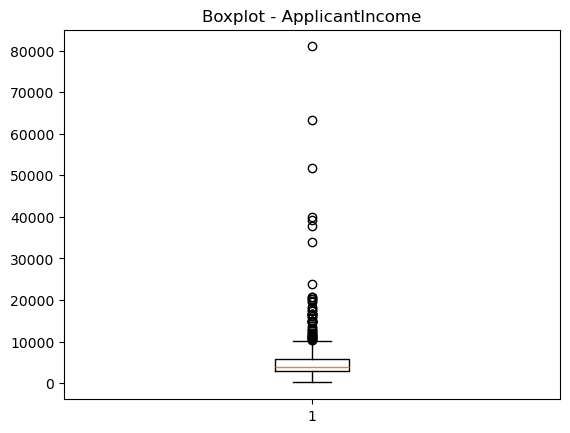

In [47]:
import matplotlib.pyplot as plt
plt.boxplot(df['ApplicantIncome'])
plt.title("Boxplot - ApplicantIncome")
plt.show()


### 4.Histogram

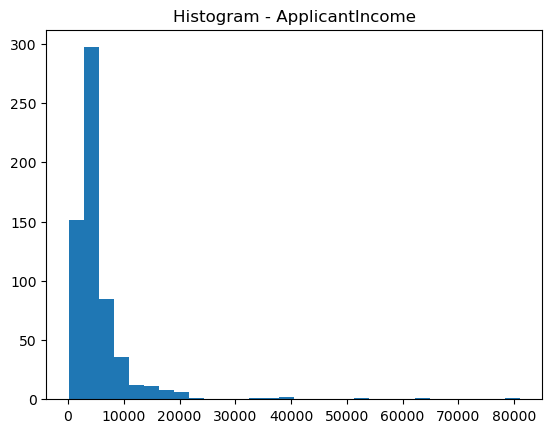

In [49]:


plt.hist(df['ApplicantIncome'], bins=30)
plt.title("Histogram - ApplicantIncome")
plt.show()


#### 5.Mean ± 3*STD Method

In [ ]:
col = 'ApplicantIncome'

mean = df[col].mean()
std = df[col].std()

lower_limit = mean - 3*std
upper_limit = mean + 3*std

std_outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
print("Mean ± 3*STD Outliers:\n", std_outliers.ApplicantIncome)


# 3.How to Handle Categorical data?

| Categorical Type                          | Meaning                 | Best Method                          |
| ----------------------------------------- | ----------------------- | ------------------------------------ |
| **Nominal** (no order)                    | Gender, City, Education | **One-Hot Encoding**                 |
| **Ordinal** (ordered levels)              | Low < Medium < High     | **Ordinal Encoding**                 |
| **Binary**                                | Yes/No, Male/Female     | **Label Encoding** or **Binary Map** |


In [ ]:
df.Gender

### A) Label Encoding (For Binary Categories)

**Use only when column has 2 unique values.**

In [ ]:

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder() #Object Creation

df.Gender=lc.fit_transform(df.Gender)

In [ ]:
df.Gender

#### B) One-Hot Encoding (For Nominal Categories)

**Best when category has no order and few unique values.**

- Example: "Education" → ["Graduate", "Not Graduate"]

In [ ]:
df.Education.value_counts()

In [ ]:
df1=pd.get_dummies(df['Education'],prefix='Education',dtype=int)
df1

In [ ]:
df=pd.concat([df,df1],axis=1).drop(['Education','Education_Graduate'],axis=1)
df.columns

In [ ]:
df.Dependents.value_counts()

In [ ]:
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})


In [ ]:
df.Dependents.value_counts()

In [ ]:
# Task loan approved into numerical using lable encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'matchType' column to obtain label-encoded values
df['Loan_Status (Approved)'] = encoder.fit_transform(df['Loan_Status (Approved)'])

# Display the result
print(df[['Loan_Status (Approved)']])

#### C) Ordinal Encoding (For Ordered Categories)

***Use when category has a natural ranking.***

Example: "Property_Area"
Rural < Semiurban < Urban

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

order = [['Rural', 'Semiurban', 'Urban']]

oe = OrdinalEncoder(categories=order)
df['Property_Area'] = oe.fit_transform(df[['Property_Area']])
df.Property_Area.value_counts()

In [ ]:
df.drop("Property_Area",axis=1,inplace=True)

In [ ]:
df

In [ ]:
df.Married.value_counts()

In [ ]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})


In [ ]:
df

In [ ]:
df.Self_Employed.value_counts()

In [ ]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

In [ ]:
df